# Inqueries about startups

In this notebook we explore a database with information about startups. It is first compiled from csv files listed on [Kaggle](https://www.kaggle.com/datasets/justinas/startup-investments?select=acquisitions.csv) and then analysed with SQL

## Database creation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
import sqlite3

%load_ext sql

``` python
engine = create_engine('sqlite:///startups.db')

table_names = ['acquisitions', 'degrees', 'funding_rounds',
               'funds', 'investments', 'ipos',
               'milestones', 'objects', 'offices',
               'people', 'relationships']
folder = 'startup_sql/'
dtype = {'id': 'str',
         'acquisition_id': 'Int64',
         'acquiring_object_id': 'str',
         'acquired_object_id': 'str',
         'term_code': 'str',
         'price_amount': 'float',
         'price_currency_code': 'str',
         'acquired_at': 'str',
         'source_url': 'str',
         'source_description': 'str',
         'object_id': 'str',
         'degree_type': 'str',
         'subject': 'str',
         'institution': 'str',
         'graduated_at': 'str',
         'created_at': 'str',
         'updated_at': 'str',
         'funding_round_id': 'Int64',
         'funded_at': 'str',
         'funding_round_type': 'str',
         'funding_round_code': 'str',
         'raised_amount_usd': 'float',
         'raised_amount': 'float',
         'raised_currency_code': 'str',
         'pre_money_valuation_usd': 'float',
         'pre_money_valuation': 'float',
         'pre_money_currency_code': 'str',
         'post_money_valuation_usd': 'float',
         'post_money_valuation': 'float',
         'post_money_currency_code': 'str',
         'participants': 'Int64',
         'is_first_round': 'Int64',
         'is_last_round': 'Int64',
         'created_by': 'str',
         'fund_id': 'Int64',
         'name': 'str',
         'funded_object_id': 'str',
         'investor_object_id': 'str',
         'investor_object_id': 'str',
         'ipo_id': 'Int64',
         'valuation_amount': 'float',
         'valuation_currency_code': 'str',
         'public_at': 'str',
         'stock_symbol': 'str',
         'milestone_at': 'str',
         'milestone_code': 'str',
         'description': 'str',
         'entity_type': 'str',
         'entity_id': 'Int64',
         'parent_id': 'str',
         'normalized_name': 'str',
         'permalink': 'str',
         'category_code': 'str',
         'status': 'str',
         'founded_at': 'str',
         'closed_at': 'str',
         'domain': 'str',
         'homepage_url': 'str',
         'twitter_username': 'str',
         'logo_url': 'str',
         'logo_width': 'float',
         'logo_height': 'float',
         'short_description': 'str',
         'overview': 'str',
         'tag_list': 'str',
         'country_code': 'str',
         'state_code': 'str',
         'city': 'str',
         'region': 'str',
         'first_investment_at': 'str',
         'last_investment_at': 'str',
         'investment_rounds': 'Int64',
         'invested_companies': 'Int64',
         'first_funding_at': 'str',
         'last_funding_at': 'str',
         'funding_rounds': 'Int64',
         'funding_total_usd': 'float',
         'first_milestone_at': 'str',
         'last_milestone_at': 'str',
         'milestones': 'Int64',
         'relationships': 'Int64',
         'office_id': 'Int64',
         'region': 'str',
         'address1': 'str',
         'address2': 'str',
         'city': 'str',
         'zip_code': 'str',
         'state_code': 'str',
         'country_code': 'str',
         'latitude': 'float',
         'longitude': 'float',
         'first_name': 'str',
         'last_name': 'str',
         'birthplace': 'str',
         'affiliation_name': 'str',
         'relationship_id': 'Int64', 
         'person_object_id': 'str',
         'relationship_object_id': 'str',
         'start_at': 'str',
         'end_at': 'str',
         'is_past': 'Int64',
         'sequence': 'float',
         'title': 'str',
         }

for table_name in table_names:
    df = pd.read_csv(folder + table_name + '.csv', dtype=dtype, index_col='id')
    df.to_sql(table_name, engine, if_exists='replace')
```

In [2]:
%sql sqlite:///startups.db

In [3]:
conn = sqlite3.connect('startups.db')
cursor = conn.cursor()

for name in ['acquisitions', 'degrees', 'funding_rounds',
               'funds', 'investments', 'ipos',
               'milestones', 'objects', 'offices',
               'people', 'relationships']:
    
    print(f'\n{name}')
    cursor.execute(f"PRAGMA table_info({name})") 
    columns = cursor.fetchall()
    for column in columns:
        print(column)
        
conn.close()


acquisitions
(0, 'id', 'TEXT', 0, None, 0)
(1, 'acquisition_id', 'BIGINT', 0, None, 0)
(2, 'acquiring_object_id', 'TEXT', 0, None, 0)
(3, 'acquired_object_id', 'TEXT', 0, None, 0)
(4, 'term_code', 'TEXT', 0, None, 0)
(5, 'price_amount', 'FLOAT', 0, None, 0)
(6, 'price_currency_code', 'TEXT', 0, None, 0)
(7, 'acquired_at', 'TEXT', 0, None, 0)
(8, 'source_url', 'TEXT', 0, None, 0)
(9, 'source_description', 'TEXT', 0, None, 0)
(10, 'created_at', 'TEXT', 0, None, 0)
(11, 'updated_at', 'TEXT', 0, None, 0)

degrees
(0, 'id', 'TEXT', 0, None, 0)
(1, 'object_id', 'TEXT', 0, None, 0)
(2, 'degree_type', 'TEXT', 0, None, 0)
(3, 'subject', 'TEXT', 0, None, 0)
(4, 'institution', 'TEXT', 0, None, 0)
(5, 'graduated_at', 'TEXT', 0, None, 0)
(6, 'created_at', 'TEXT', 0, None, 0)
(7, 'updated_at', 'TEXT', 0, None, 0)

funding_rounds
(0, 'id', 'TEXT', 0, None, 0)
(1, 'funding_round_id', 'BIGINT', 0, None, 0)
(2, 'object_id', 'TEXT', 0, None, 0)
(3, 'funded_at', 'TEXT', 0, None, 0)
(4, 'funding_round_typ

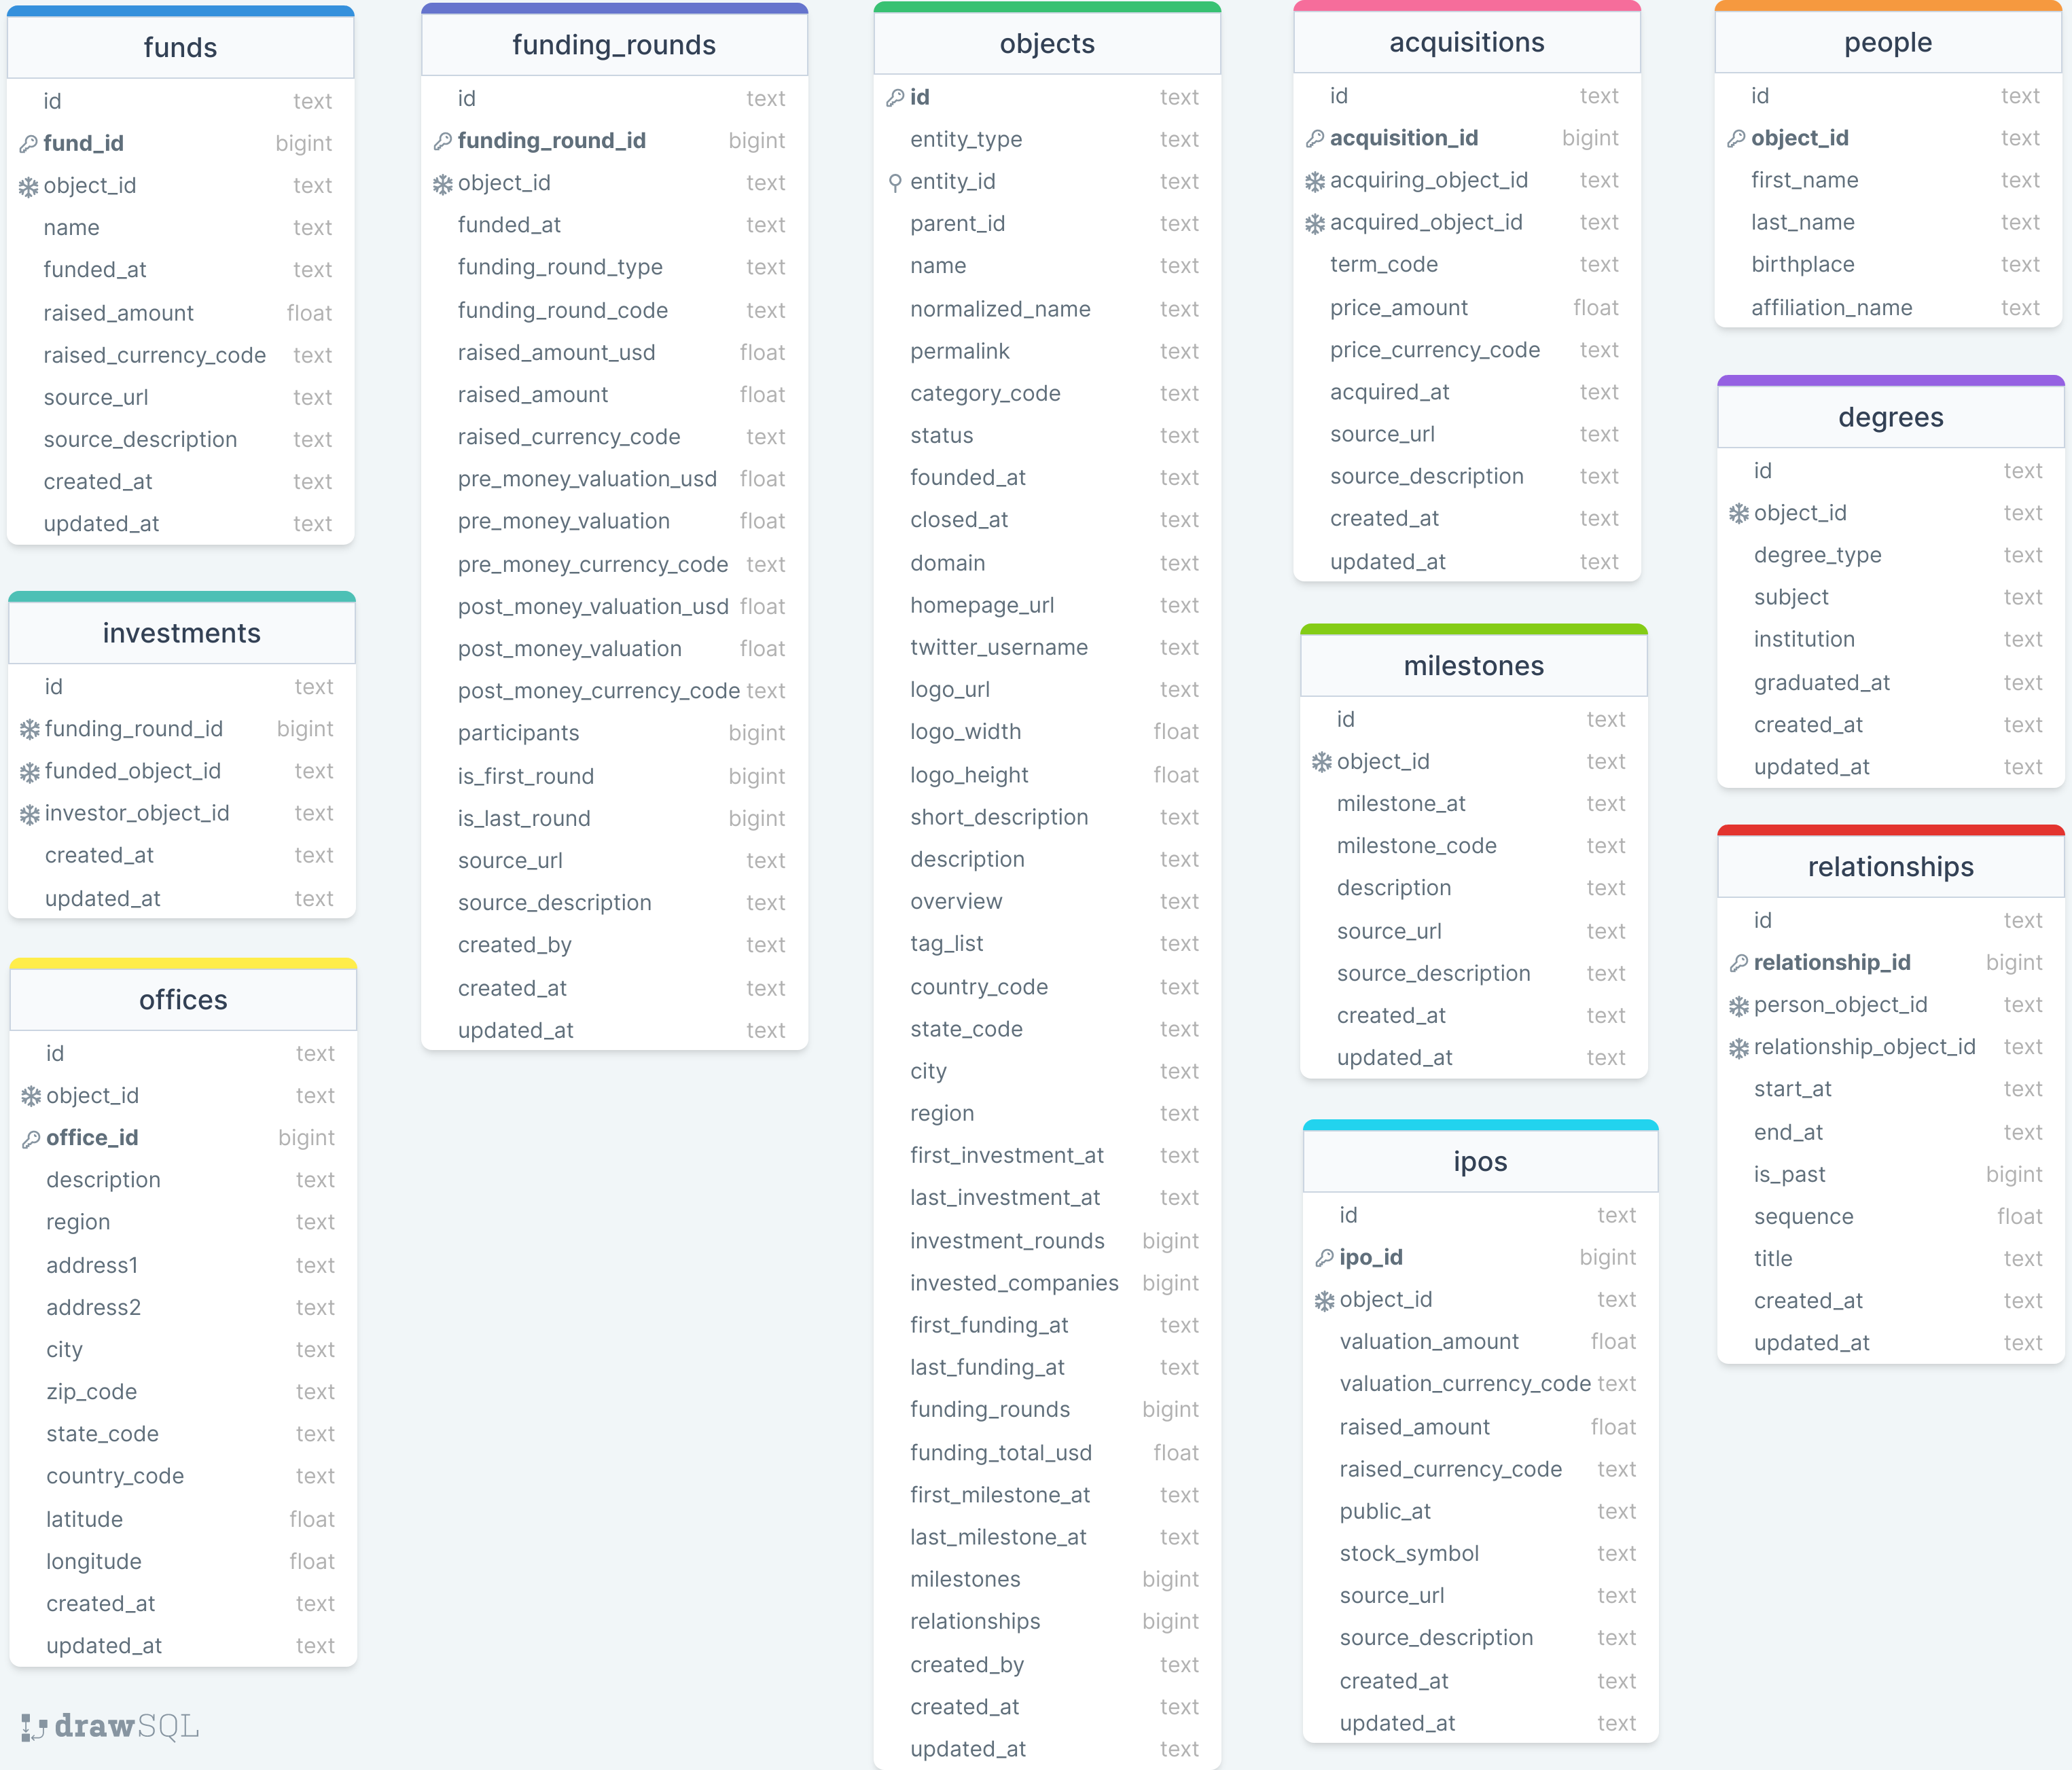

## Inquiries

### **Number of companies terminated during the financial crisis**

In [4]:
%%sql
SELECT strftime('%Y', closed_at) AS date,
       COUNT(*) AS n_companies_closed
FROM objects
WHERE status = 'closed'
AND entity_type = 'Company'
AND date in ('2007', '2008', '2009')
GROUP BY date

 * sqlite:///startups.db
Done.


date,n_companies_closed
2007,30
2008,124
2009,220


### **Funds for news companies in the US**

In [5]:
%%sql
SELECT name,
       SUM(funding_total_usd) AS total_funds
FROM objects
WHERE country_code = 'USA'
AND category_code = 'news'
AND entity_type='Company'
GROUP BY name
ORDER BY SUM(funding_total_usd) DESC
LIMIT 10

 * sqlite:///startups.db
Done.


name,total_funds
Demand Media,622552813.0
New York Times,250000000.0
Flipboard,160500000.0
Broadcast Facilities,128000000.0
Alloy,126500000.0
Vice Media Group,70000000.0
Cheezburger,69000000.0
Vox Media,61132220.0
ADOR,56464869.0
BuzzFeed,46300000.0


### **Cash spent on acquisition between 2011 and 2013**

In [6]:
%%sql
SELECT strftime('%Y', acquired_at) AS date,
       SUM(price_amount) AS total_acquisition_price
FROM acquisitions
WHERE term_code = 'cash'
AND price_currency_code = 'USD'
GROUP BY date
HAVING date IN ('2011', '2012', '2013')

 * sqlite:///startups.db
Done.


date,total_acquisition_price
2011,68125232836.0
2012,29816841940.0
2013,39819859860.0


### **Employees' Twitter usernames that start with "silver"**

In [7]:
%%sql
SELECT p.first_name,
       p.last_name,
       o.twitter_username
FROM people AS p
LEFT JOIN objects AS o ON p.object_id = o.id
WHERE o.twitter_username LIKE 'Silver%'
AND o.entity_type = 'Person'
ORDER BY p.last_name
LIMIT 10

 * sqlite:///startups.db
Done.


first_name,last_name,twitter_username
Andy,Ball,silverbackmktg
Mattias,Guilotte,Silverreven
Silver,Hage,silverhage
Min Pyo,Hong,silverdel
Rebecca,Silver,SilverRebecca
Michael,Silverton,silverton
Silver,Teede,SilverMatrixx


### **Employees' Twitter usernames containing "money" and last name starting with "K"**

In [8]:
%%sql
SELECT p.last_name,
       o.twitter_username
FROM people AS p
LEFT JOIN objects AS o ON p.object_id=o.id
WHERE o.twitter_username LIKE '%money%'
AND p.last_name LIKE "K%"

 * sqlite:///startups.db
Done.


last_name,twitter_username
Kim,gmoney75


### **Raised funds by country**

In [9]:
%%sql
SELECT country_code,
       SUM(funding_total_usd) AS total_raised_funds
FROM objects
GROUP BY country_code
ORDER BY SUM(funding_total_usd) DESC
LIMIT 10

 * sqlite:///startups.db
Done.


country_code,total_raised_funds
USA,310588431344.0
GBR,17705621151.0
None,10855920874.0
CHN,10689737173.0
CAN,9866361996.0
IND,6141410131.0
DEU,5765773985.0
FRA,4595137753.0
ISR,4480091628.0
CHE,2829252715.0


### **Min and max funding by date**

In [10]:
%%sql
SELECT funded_at AS date,
       MIN(raised_amount_usd) AS min_funds,
       MAX(raised_amount_usd) AS max_funds
FROM funding_rounds
GROUP BY date
HAVING min_funds != 0
ORDER BY date DESC
LIMIT 10

 * sqlite:///startups.db
Done.


date,min_funds,max_funds
2013-12-08,378813.0,364000000.0
2013-11-28,111500.0,115794000.0
2013-11-23,100000.0,100000.0
2013-11-17,321650.0,7500000.0
2013-11-16,335000.0,335000.0
2013-11-13,50000.0,79000000.0
2013-11-10,240000.0,13000000.0
2013-11-06,13500.0,185000000.0
2013-10-26,530000.0,530000.0
2013-10-20,300000.0,3000000.0


### **Categorizing funds by activity**

In [28]:
%%sql
SELECT name,
       invested_companies,
       CASE
           WHEN invested_companies >= 100 THEN 'high_activity'
           WHEN invested_companies >= 20 AND invested_companies <= 99 THEN 'middle_activity'
           WHEN invested_companies < 20 THEN 'low_activity'
       END AS activity
FROM objects
WHERE id IN (SELECT object_id
             FROM funds)
ORDER BY name
LIMIT 10

 * sqlite:///startups.db
Done.


name,invested_companies,activity
123Venture,8,low_activity
137 Ventures,12,low_activity
21 Partners,0,low_activity
212,2,low_activity
32 Degrees Capital,0,low_activity
3TS Capital Partners,8,low_activity
4Di Capital,4,low_activity
500 Startups,315,high_activity
5AM Ventures,27,middle_activity
A-Z Beteiligungen,1,low_activity


### **Average number of investment rounds by activity**

In [30]:
%%sql
SELECT CASE
           WHEN invested_companies >= 100 THEN 'high_activity'
           WHEN invested_companies >= 20 AND invested_companies <= 99 THEN 'middle_activity'
           WHEN invested_companies < 20 THEN 'low_activity'
       END AS activity,
ROUND(AVG(investment_rounds)) AS avg_investment_rounds
FROM objects
GROUP BY activity

 * sqlite:///startups.db
Done.


activity,avg_investment_rounds
high_activity,252.0
low_activity,0.0
middle_activity,50.0


### **Education of employees**

In [136]:
%%sql
SELECT p.first_name,
       p.last_name,
       d.institution
FROM people AS p
INNER JOIN degrees AS d ON p.object_id = d.object_id
ORDER BY last_name
LIMIT 10

 * sqlite:///startups.db
Done.


first_name,last_name,institution
William,"""BJ"" Jenkins",Harvard Business School
William,"""BJ"" Jenkins",University of Illinois
Balaji,"""Bala"" Jayaraman",Cornell University - Johnson Graduate School of Management
Balaji,"""Bala"" Jayaraman",LearningTree
Balaji,"""Bala"" Jayaraman",Loyola College
Elizabeth,"""Beezer"" Clarkson",Harvard Business School
Elizabeth,"""Beezer"" Clarkson",Wesleyan University
William,"""Bill"" G. Barker",Dartmouth College
William,"""Bill"" G. Barker",Northwestern University's Kellogg School of Management
Arthur,"""Bobby"" Greenberg",Henderson State University


### **Number of institutions employees graduated from**

In [46]:
%%sql
SELECT o.name,
       COUNT(DISTINCT d.institution) AS n_institutions
FROM objects AS o
INNER JOIN relationships AS r ON o.id = r.relationship_object_id
INNER JOIN people AS p ON r.person_object_id = p.object_id
INNER JOIN degrees AS d ON p.object_id = d.object_id
WHERE o.entity_type = 'Company'
GROUP BY o.name
ORDER BY n_institutions DESC
LIMIT 10

 * sqlite:///startups.db
Done.


name,n_institutions
Microsoft,703
IBM,630
Google,543
Hewlett-Packard,511
Oracle Corporation,508
Yahoo!,503
McKinsey & Company,452
Cisco,404
Accenture,392
AT&T,348


### **Failed startups with first funding round being the last**

In [113]:
%%sql
SELECT name
FROM objects
WHERE id IN (SELECT DISTINCT object_id
             FROM funding_rounds
             WHERE is_first_round = 1
             AND is_last_round = 1)
AND status = 'closed'
ORDER BY name
LIMIT 10

 * sqlite:///startups.db
Done.


name
.Fox Networks
10BestThings
11i Solutions
169 ST.
1Cast
1DayMakeover
1bib
25eight
27 Perry
2Win-Solutions


### **Employees of the failed startups**

In [134]:
%%sql
WITH tab AS (
SELECT id
FROM objects
WHERE id IN (SELECT DISTINCT object_id
             FROM funding_rounds
             WHERE is_first_round = 1
             AND is_last_round = 1)
AND status = 'closed')

SELECT o.name,
       p.object_id,
       p.first_name,
       p.last_name
FROM objects AS o
INNER JOIN relationships AS r ON o.id = r.relationship_object_id
INNER JOIN people AS p ON r.person_object_id = p.object_id
WHERE o.id IN tab
ORDER BY name
LIMIT 10

 * sqlite:///startups.db
Done.


name,object_id,first_name,last_name
.Fox Networks,p:15940,Damian,Voltes
.Fox Networks,p:44429,Massimo,Vimini
.Fox Networks,p:70132,Maria Cecilia,Cocholilo y Petrosini
10BestThings,p:48552,Vince,Franz
10BestThings,p:48553,Mike,Barone
10BestThings,p:48554,Andrew,Playford
169 ST.,p:57297,Eduardo,Fuentes
1Cast,p:16509,Anthony,Bontrager
1Cast,p:23759,Travis,McElfresh
1Cast,p:40377,Jack,Hallahan


### **Employees of the failed startups and their education**

In [142]:
%%sql
WITH 

tab AS (
SELECT id
FROM objects
WHERE id IN (SELECT DISTINCT object_id
             FROM funding_rounds
             WHERE is_first_round = 1
             AND is_last_round = 1)
AND status = 'closed'),

empl AS (
SELECT p.object_id
FROM objects AS o
INNER JOIN relationships AS r ON o.id = r.relationship_object_id
INNER JOIN people AS p ON r.person_object_id = p.object_id
WHERE o.id IN tab
ORDER BY name)

SELECT p.first_name,
       p.last_name,
       d.institution
FROM people AS p
INNER JOIN degrees AS d ON p.object_id = d.object_id
WHERE p.object_id IN empl
ORDER BY last_name
LIMIT 10

 * sqlite:///startups.db
Done.


first_name,last_name,institution
Ashwin,A,GOVT. COLLAGE OF ENGG. CHANDRAPUR
Itai,Aaronsohn,Tel Aviv University
Maha,Achour,Massachusetts Institute of Technology (MIT)
Maha,Achour,University of California
Randy,Adams,Massachusetts Institute of Technology (MIT)
Chris,Adams,University of Guelph
Gil,Adani,Bar-Ilan University
Gil,Adani,Tel Aviv University
David,Adewumi,Pennsylvania State University
Prakhar,Aghamkar,University of Cincinnati


### **Number of institutions employees of the failed startups graduated from**

In [145]:
%%sql
WITH 

tab AS (
SELECT id
FROM objects
WHERE id IN (SELECT DISTINCT object_id
             FROM funding_rounds
             WHERE is_first_round = 1
             AND is_last_round = 1)
AND status = 'closed'),

empl AS (
SELECT p.object_id
FROM objects AS o
INNER JOIN relationships AS r ON o.id = r.relationship_object_id
INNER JOIN people AS p ON r.person_object_id = p.object_id
WHERE o.id IN tab
ORDER BY name)

SELECT p.first_name,
       p.last_name,
       COUNT(DISTINCT d.institution) AS n_distinct_institutions,
       COUNT(d.institution) AS n_institutions
FROM people AS p
INNER JOIN degrees AS d ON p.object_id = d.object_id
WHERE p.object_id IN empl
GROUP BY p.object_id
ORDER BY n_institutions DESC
LIMIT 10

 * sqlite:///startups.db
Done.


first_name,last_name,n_distinct_institutions,n_institutions
Maria Cecilia,Cocholilo y Petrosini,6,7
Travis,McElfresh,6,6
Manuel,Guerzoni,4,5
James,King,5,5
Sonu,Pandey,4,5
Dan,Munro,4,4
Robb,Myer,3,4
Devin,McQueeney,4,4
Narbeh,Derhacobian,2,4
Dr.,Jim Butler,4,4


### **Average number of institutions employees of the failed startups graduated from**

In [161]:
%%sql
WITH 

tab AS (
SELECT id
FROM objects
WHERE id IN (SELECT DISTINCT object_id
             FROM funding_rounds
             WHERE is_first_round = 1
             AND is_last_round = 1)
AND status = 'closed'),

empl AS (
SELECT p.object_id
FROM objects AS o
INNER JOIN relationships AS r ON o.id = r.relationship_object_id
INNER JOIN people AS p ON r.person_object_id = p.object_id
WHERE o.id IN tab
ORDER BY name),

inst AS (
SELECT p.first_name,
       p.last_name,
       COUNT(DISTINCT d.institution) AS n_distinct_institutions,
       COUNT(d.institution) AS n_institutions
FROM people AS p
INNER JOIN degrees AS d ON p.object_id = d.object_id
WHERE p.object_id IN empl
GROUP BY p.object_id
ORDER BY n_institutions DESC)

SELECT AVG(n_institutions) AS avg_institutions
FROM inst

 * sqlite:///startups.db
Done.


avg_institutions
1.624862486248625


### **Number of institutions employees of Facebook graduated from**

In [167]:
%%sql
SELECT p.first_name,
       p.last_name,
       COUNT(DISTINCT d.institution) AS n_distinct_institutions,
       COUNT(d.institution) AS n_institutions
FROM people AS p
INNER JOIN degrees AS d ON p.object_id = d.object_id
WHERE p.object_id IN (SELECT person_object_id
                      FROM relationships
                      WHERE relationship_object_id IN (SELECT id
                                                       FROM objects
                                                       WHERE name = 'Facebook'))
GROUP BY p.object_id
ORDER BY n_institutions DESC
LIMIT 10

 * sqlite:///startups.db
Done.


first_name,last_name,n_distinct_institutions,n_institutions
Neeraj,Agrawal,5,5
Reid,Hoffman,3,4
Lorry,Destainville,3,4
Gokul,Rajaram,3,3
Chris,Kelly,3,3
Russ,Heddleston,2,3
Alexander,Kleinberg,3,3
Barak,Naveh,3,3
Erick,Tseng,2,3
Paul,Tarjan,2,3


### **Startups with >6 milestones and their funding in 2012-2013**

In [200]:
%%sql
SELECT o.name AS company_name,
       f.name AS fund_name,
       fr.raised_amount_usd AS raised_funds
FROM investments AS i 
JOIN objects AS o ON i.funded_object_id = o.id
JOIN funds AS f ON i.investor_object_id = f.object_id
JOIN funding_rounds AS fr ON i.funding_round_id = fr.funding_round_id
WHERE o.milestones > 6
AND strftime('%Y', fr.funded_at) IN ('2012', '2013')
ORDER BY CAST(o.entity_id AS decimal), CAST(f.id AS decimal), CAST(fr.id AS decimal)
LIMIT 20

 * sqlite:///startups.db
Done.


company_name,fund_name,raised_funds
OpenX,Fund IV Early Stage Tech,25011200.0
OpenX,Index Ventures Growth I,25011200.0
OpenX,Index Ventures IV,25011200.0
OpenX,Index Ventures III,25011200.0
OpenX,Accel Fund,25011200.0
OpenX,Accel XI,25011200.0
OpenX,Accel Growth Fund II,25011200.0
OpenX,Sidecar funds,25011200.0
OpenX,Index Ventures Growth II,25011200.0
OpenX,Accel India Fund III,25011200.0


### **Aquisition of startups by companies, their price and total funding**

In [215]:
%%sql
SELECT o1.name AS acquiring_company,
       o2.name AS acquired_company,
       a.price_amount AS price,
       o2.funding_total_usd AS acquired_company_total_funding,
       ROUND(a.price_amount/o2.funding_total_usd) AS price_to_funding_ratio
FROM acquisitions AS a 
JOIN objects AS o1 ON a.acquiring_object_id = o1.id
JOIN objects AS o2 ON a.acquired_object_id = o2.id
WHERE price > 0
AND acquired_company_total_funding > 0
ORDER BY price DESC
LIMIT 10

 * sqlite:///startups.db
Done.


acquiring_company,acquired_company,price,acquired_company_total_funding,price_to_funding_ratio
Microsoft,Skype,8500000000.0,76805032.0,111.0
Scout Labs,Varian Semiconductor Equipment Associates,4900000000.0,4800000.0,1021.0
Broadcom,NetLogic Microsystems,3700000000.0,188527015.0,20.0
Broadcom,Aeluros,3700000000.0,7970000.0,464.0
Level 3 Communications,Global Crossing,3000000000.0,41000000.0,73.0
Yahoo!,GeoCities,2870000000.0,40000000.0,72.0
eBay,Skype,2600000000.0,76805032.0,34.0
Salesforce,ExactTarget,2500000000.0,238209999.0,10.0
International Benefits Holdings,Reward Gateway,2500000000.0,39722025.0,63.0
Johnson & Johnson,Crucell,2300000000.0,443000000.0,5.0


### **"Social" companies that received funding between 2010-2013**

In [224]:
%%sql
SELECT o.name,
       f.funded_at AS funding_date,
       f.raised_amount_usd AS funding_amount
FROM objects AS o
JOIN funding_rounds AS f ON o.id = f.object_id
WHERE o.category_code = 'social'
AND o.entity_type = 'Company'
AND strftime('%Y', f.funded_at) IN ('2010', '2011', '2012', '2013')
AND f.raised_amount_usd > 0
ORDER BY funding_amount DESC
LIMIT 10

 * sqlite:///startups.db
Done.


name,funding_date,funding_amount
Facebook,2011-01-21,1500000000.0
Twitter,2011-08-02,400000000.0
Twitter,2011-09-08,400000000.0
Pinterest,2013-10-23,225000000.0
Facebook,2010-06-28,210000000.0
Twitter,2010-12-15,200000000.0
Pinterest,2013-02-20,200000000.0
HootSuite,2013-08-01,165000000.0
Pinterest,2012-05-17,100000000.0
LinkedIn,2013-05-01,81713488.0


### **Total funding of startups founded between 2011-2013 averaged by country**

In [287]:
%%sql
WITH 
tab_2011 AS (
SELECT country_code,
       ROUND(AVG(funding_total_usd), 2) AS AVG_2011
FROM objects AS o
WHERE strftime('%Y', founded_at) = '2011'
AND entity_type = 'Company'
GROUP BY country_code),

tab_2012 AS (
SELECT country_code,
       ROUND(AVG(funding_total_usd), 2) AS AVG_2012
FROM objects AS o
WHERE strftime('%Y', founded_at) = '2012'
AND entity_type = 'Company'
GROUP BY country_code),

tab_2013 AS (
SELECT country_code,
       ROUND(AVG(funding_total_usd), 2) AS AVG_2013
FROM objects AS o
WHERE strftime('%Y', founded_at) = '2013'
AND entity_type = 'Company'
GROUP BY country_code)

SELECT tab_2011.country_code,
       tab_2011.AVG_2011,
       tab_2012.AVG_2012,
       tab_2013.AVG_2013
FROM tab_2011
LEFT JOIN tab_2012 ON tab_2011.country_code = tab_2012.country_code
LEFT JOIN tab_2013 ON tab_2012.country_code = tab_2013.country_code
ORDER BY AVG_2011 DESC
LIMIT 10

 * sqlite:///startups.db
Done.


country_code,AVG_2011,AVG_2012,AVG_2013
CYM,30650000.0,None,None
UMI,30500000.0,None,None
PER,4000000.0,41000.0,25000.0
USA,2243955.46,1206706.42,1093364.14
HKG,2180783.66,226227.27,0.0
PHL,1750000.0,4218.75,2500.0
ARE,1718000.0,197222.22,35333.33
JPN,1664307.45,674719.97,50000.0
AUT,1534202.68,147806.0,85773.33
BRA,1380068.43,240638.97,67944.44
